# 0. Preprocess Data

In [1]:
### BDE ###
import os
from dotenv import load_dotenv
load_dotenv()
from dataframe.load import load_csv
from descriptor.fingeprint_from_smiles import smiles_list_to_fingerprint_dataframe
df = load_csv('./data/oximesters_BDE.csv')
smiles = df['Smiles'].values.tolist()
bdes = df['BDE'].values.tolist()
#df_fin = smiles_list_to_fingerprint_dataframe(smiles, int(os.environ['RADIUS_BDE']), int(os.environ['NBITS_BDE']))
df_fin = smiles_list_to_fingerprint_dataframe(smiles, 6, int(os.environ['NBITS_BDE']))
#int(os.environ['RADIUS_BDE'])
df_fin['BDE'] = bdes
df_fin.to_csv('./data/oximesters_fingerprint_BDE.csv')

  0%|          | 0/257 [00:00<?, ?it/s]

In [30]:
### abs fingerprint ###
import os
from dotenv import load_dotenv
load_dotenv()
from dataframe.load import load_csv
from descriptor.fingeprint_from_smiles import smiles_list_to_fingerprint_dataframe
#delete_cols = ['1330', '1262', '1395']
delete_cols = [1330, 1262, 1395, 1035, 1820, 1352, 1758, 1594, 262, 359, 944, 995, 1934, 1711, 1152, 1816, 636, 177, 1160, 1846]
df = load_csv('./data/oxims_absorbance_labels.csv')
smiles = df['Smiles'].values.tolist()
labels = df['absorbance_label'].values.tolist()
df_fin = smiles_list_to_fingerprint_dataframe(smiles, int(os.environ['RADIUS_abs']), int(os.environ['NBITS_abs']), delete_cols=delete_cols)
df_fin['absorbance_label'] = labels
df_fin.to_csv('./data/oximesters_fingerprint_abs.csv')

  0%|          | 0/252 [00:00<?, ?it/s]

In [ ]:
from descriptor.generator import DescriptorGenerator
from dataframe.load import load_csv
import os
from dotenv import load_dotenv
load_dotenv()
df = load_csv('./data/oxims_absorbance_labels.csv')
smiles = df['Smiles'].values.tolist()
generator = DescriptorGenerator(smiles)
labels = df['absorbance_label'].values.tolist()
generator.generator(None, labels, 'absorbance_label')

In [1]:
### abs fingerprint ###
import os
from dotenv import load_dotenv
load_dotenv()
from dataframe.load import load_csv
from descriptor.fingeprint_from_smiles import smiles_list_to_fingerprint_dataframe
#delete_cols = ['1330', '1262', '1395']
delete_cols = [1330, 1262, 1395, 1035, 1820, 1352, 1758, 1594, 262, 359, 944, 995, 1934, 1711, 1152, 1816, 636, 177, 1160, 1846]
df = load_csv('./data/T1_oximesters.csv')
smiles = df['Smiles'].values.tolist()
T1s = df['T1'].values.tolist()
df_fin = smiles_list_to_fingerprint_dataframe(smiles, int(os.environ['RADIUS_T1']), int(os.environ['NBITS_T1']), delete_cols=delete_cols)
df_fin['T1'] = T1s
df_fin.to_csv('./data/T1_oximesters_fingerprint.csv')

  0%|          | 0/280 [00:00<?, ?it/s]

## 0-2. rdkit + mopac

In [ ]:
from dataframe.load import load_csv
from descriptor.generator import DescriptorGenerator
import os
from dotenv import load_dotenv
load_dotenv()
df = load_csv('./data/oximesters_BDE.csv')
smiles = df['Smiles'].values.tolist()
rads = df['iminyl_radical'].values.tolist()
BDE = df['BDE'].values.tolist()
generator = DescriptorGenerator(smiles)
df = generator.generator(None, y=BDE, y_column='BDE')
print('data_length:{}\n'.format(len(df)), 'numer of descriptors: {}'.format(len(df.columns) - 1))
df.head()

In [ ]:
### BDE_mordred ###
from dataframe.load import load_csv
from descriptor.generator import DescriptorGenerator
import os
from dotenv import load_dotenv
load_dotenv()
df = load_csv('./data/oximesters_BDE.csv')
smiles = df['Smiles'].values.tolist()
BDE = df['BDE'].values.tolist()
generator = DescriptorGenerator(smiles)
df = generator.mordred_descriptors(y=BDE, y_column='BDE')
print('data_length:{}\n'.format(len(df)), 'numer of descriptors: {}'.format(len(df.columns) - 1))
df.to_csv('./data/BDE_mordred_descriptors.csv')
df.head()

In [ ]:
from dataframe.load import load_csv
from descriptor.generator import DescriptorGenerator
import os
from dotenv import load_dotenv
load_dotenv()
df = load_csv('./data/oxims_absorbance_labels.csv')
smiles = df['Smiles'].values.tolist()
abs_labels = df['absorbance_label'].values.tolist()
generator = DescriptorGenerator(smiles)
df = generator.generator(None, y=abs_labels, y_column='absorbance_label')
print('data_length:{}\n'.format(len(df)), 'numer of descriptors: {}'.format(len(df.columns) - 1))
df.to_csv('./data/descriptors_absorbance_label.csv')
df.head()

In [ ]:
import numpy as np
from dataframe.load import load_csv
df = load_csv('/Users/watanabeyuuya/OneDrive - 横浜国立大学/oxim_BDE_rdki_des.csv')
df = df.iloc[:, 1: 223]
df.head()

In [ ]:
import pandas as pd
cm = pd.DataFrame(np.corrcoef(df.T), columns=df.columns, index=df.columns)
cm.head()

In [ ]:
criterion = 0.6
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
list_drop = [column for column in upper.columns if any(upper[column] > criterion)]
print(len(list_drop))

In [ ]:
print(list_drop)

In [ ]:
df_gen = df.copy()
df_gen.drop(list_drop, axis=1, inplace=True)
df_gen

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm_new = pd.DataFrame(np.corrcoef(df_gen.T), columns=df_gen.columns, index=df_gen.columns)
plt.figure(figsize = (100, 100))
sns.heatmap(cm_new, annot=True, square=True, vmin=-1, vmax=1, fmt=".2f", cmap="RdBu")
plt.show()

In [ ]:
df_gen.to_csv('/Users/watanabeyuuya/OneDrive - 横浜国立大学/oxim_BDE_rdki_des_.csv')

# 1. Neural Network

## 1-1. training

In [ ]:
### BDE ###
%run neural_network/main.py --epoch=100000 --batch_size=64 --log_path="./neural_network/log/" --df_path='./data/T1_oximesters_fingerprint.csv'  --learning_rate=0.0001  --y_column='T1' --normalize=True --delete_logs=True

  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
### T1 ###
%run neural_network/main.py --epoch=10000 --batch_size=128 --log_path="./neural_network/log/" --df_path='./data/T1_oximesters_fingerprint.csv'  --learning_rate=0.0001  --y_column='T1' --normalize=False --delete_logs=True

In [ ]:
### BDE ###
%run neural_network/main_rdkit_descriptor.py --epoch=10000 --batch_size=4 --log_path="./neural_network/log/" --df_path="./data/oxim_BDE_rdki_des.csv"  --learning_rate=0.0001  --y_column="BDE" --normalize=True --delete_logs=True

In [2]:
### Spectra ###
%run neural_network/main_abs.py --epoch=10000 --batch_size=128 --log_path="./neural_network/log/" --df_path="./data/oximesters_fingerprint_abs.csv" --learning_rate=0.00001 --y_column='absorbance_label' --normalize=False --delete_logs=True --use_batchnorm=True --use_dropout=False

  0%|          | 0/10000 [00:00<?, ?it/s]

[0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 1 0 0 1 1 0 0 1] predicted
[0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 1 0 0 1 1 0 0 1] label test
-----test score-----
 [[28  3]
 [ 4 16]] 
 ------------- tensor(86.2745)


## 1-2. predict

# 2. xgboost

## 2-1. training

In [ ]:
df_path = './data/descriptors_bde.csv'

/Users/watanabeyuuya/opt/anaconda3/envs/chem/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


shape of x_train: (224, 2028)
 shape of x_test: (56, 2028)
 shape of y_train: (224,)
 shape of y_test: (56,)
----first validation's score----
scores [-0.04915473 -0.03863713 -0.02473867 -0.02370596 -0.08459507]
mean:-0.04416631075453335
---------------------------------


  0%|          | 0/8 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


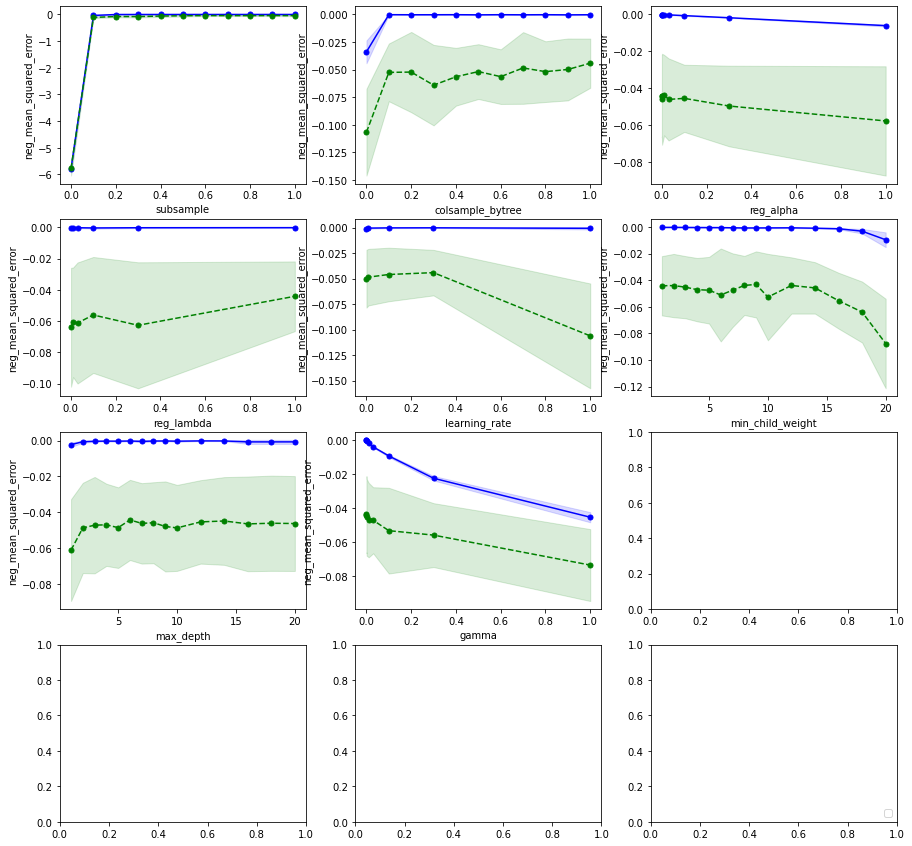

In [2]:
%run xgboost_/pre_tuning.py --y_column='T1' --df_path='./data/T1_oximesters_fingerprint.csv' --mode="BDE" --eval_method="RMSE"

In [ ]:
from xgboost_.tuning import optuna_tuning
y_column = "BDE"
method = "RMSE"
optuna_tuning(df_path, y_column, method)

shape of x_train: (224, 2028)
 shape of x_test: (56, 2028)
 shape of y_train: (224,)
 shape of y_test: (56,)
best parameters{'colsample_bytree': 1.0, 'gamma': 0.001, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 9, 'reg_alpha': 0.001, 'reg_lambda': 1.0, 'subsample': 0.5}
score -0.06799856910194813
time eplapsed4.746817111968994sec
========xgboost training done========


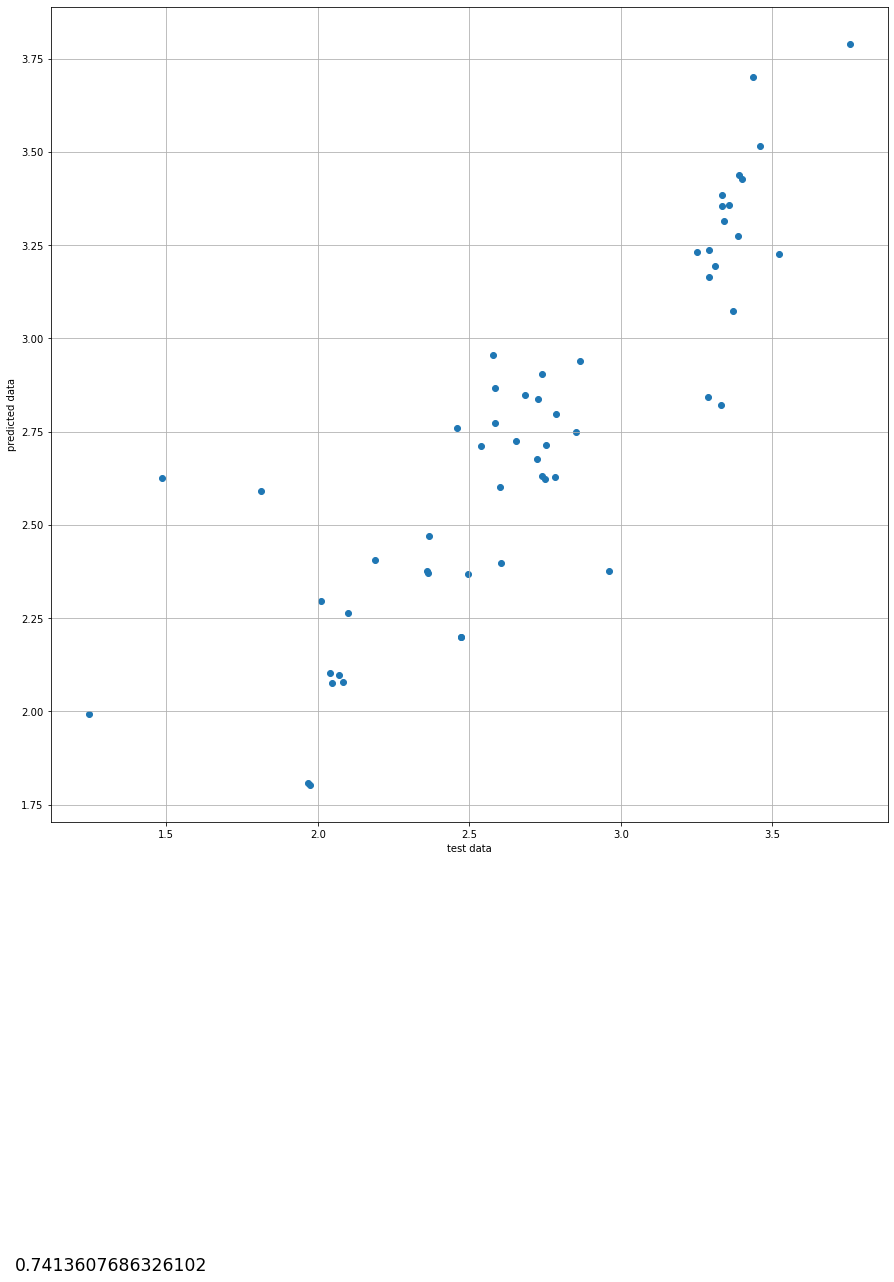

In [3]:
from xgboost_.tuning import xgb_train
cv_params = {
    # sampling data ratio xgboost is going to select
    'subsample': [0.5],
    # subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    'colsample_bytree': [1.0],
    # L1 regularization term on weights. Increasing this value will make model more conservative
    'reg_alpha': [0.001],
    # L2 regularization term on weights. Increasing this value will make model more conservative
    'reg_lambda': [1.0],
    # learning rate
    'learning_rate': [0.3],
    # Minimum sum of instance weight (hessian) needed in a child
    'min_child_weight': [9],
    # max depth
    'max_depth': [6],
    # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'gamma': [0.001],
}
df_path = './data/T1_oximesters_fingerprint.csv'
y_column = "T1"
method = "RMSE"
xgb_train(cv_params, df_path, y_column, method)

/Users/watanabeyuuya/opt/anaconda3/envs/chem/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


shape of x_train: (201, 2028)
 shape of x_test: (51, 2028)
 shape of y_train: (201,)
 shape of y_test: (51,)
----first validation's score----
scores [-0.24582072 -0.15300657 -0.19980154 -0.24557951 -0.20906249]
mean:-0.21065416748115862
---------------------------------


  0%|          | 0/8 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


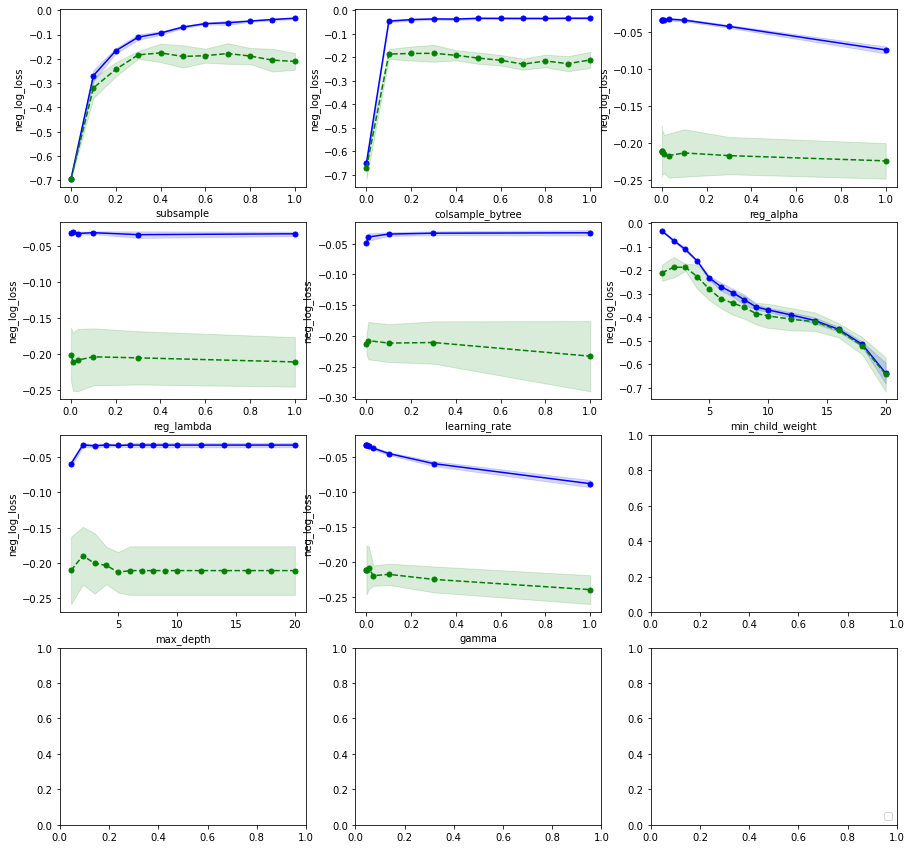

In [1]:
%run xgboost_/pre_tuning.py --y_column="absorbance_label" --df_path="./data/oximesters_fingerprint_abs.csv" --mode="abs"

In [2]:
from xgboost_.tuning import xgb_train_abs
cv_params = {
    # sampling data ratio xgboost is going to select
    'subsample': [0.5, 1.0],
    # subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    'colsample_bytree': [0.7, 0.8],
    # L1 regularization term on weights. Increasing this value will make model more conservative
    'reg_alpha': [0.01, 1.0],
    # L2 regularization term on weights. Increasing this value will make model more conservative
    'reg_lambda': [0.1],
    # learning rate
    'learning_rate': [0.3],
    # Minimum sum of instance weight (hessian) needed in a child
    'min_child_weight': [2, 3],
    # max depth
    'max_depth': [1, 2],
    # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'gamma': [0.1],
}
df_path = "./data/oximesters_fingerprint_abs.csv"
y_column = "absorbance_label"
xgb_train_abs(cv_params, df_path, y_column)

shape of x_train: (201, 2028)
 shape of x_test: (51, 2028)
 shape of y_train: (201,)
 shape of y_test: (51,)


/Users/watanabeyuuya/opt/anaconda3/envs/chem/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


best parameters{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 2, 'reg_alpha': 0.01, 'reg_lambda': 0.1, 'subsample': 1.0}
score -0.18216006549610472
time eplapsed29.688555002212524sec
[12:43:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
pred [1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 0 1 0]
test [1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 1 0]
0.9215686274509803
========xgboost training done========


In [ ]:
from xgboost_.tuning import optuna_tuning
y_column = 'absorbance_label'
method = 'classification'
df_path = './data/oximesters_fingerprint_abs.csv'
optuna_tuning(df_path, y_column, method, task='classification')

## 2-2. analysis

### 2-2-1. BDE

In [3]:
from xgboost_.analyzer import XGBoostAnalyzer
model_path = './xgboost_/model/xgb_model_absorbance_label.pickle'
analyzer = XGBoostAnalyzer(model_path)

In [4]:
from dataframe.load import load_csv
df = load_csv('./data/oximesters_fingerprint_abs.csv')
features = list(df.columns)
features = features[1:-1]
print(len(features), features[0], features[-1])

2028 0 2047


In [5]:
# plot feature importances
fis = analyzer.get_FI(features=features)
fis = sorted(fis.items(), key=lambda x:x[1], reverse=True)
descriptors = {}
for key, val in fis:
    if val > 0:
        descriptors[key] = val
print(descriptors)

{'722': 0.10294708, '827': 0.09274866, '1697': 0.091589905, '121': 0.08638411, '1385': 0.08549544, '2025': 0.079533026, '984': 0.0753531, '788': 0.06138975, '1780': 0.0530569, '1226': 0.03444136, '1738': 0.028918456, '1991': 0.026143562, '1724': 0.025521081, '935': 0.021029556, '1017': 0.020805769, '1625': 0.01970187, '1722': 0.0122406045, '1357': 0.011095187, '926': 0.010568062, '71': 0.008445442, '1088': 0.008356127, '36': 0.0060635805, '850': 0.0059784087, '875': 0.0059171873, '794': 0.005791727, '1632': 0.0057314713, '1199': 0.0034808295, '352': 0.0031956118, '1980': 0.0022156162, '224': 0.0016377438, '1911': 0.0013202815, '680': 0.0011149871, '80': 0.000925538, '294': 0.0008619999}


In [6]:
from smiles.grid_mol import grid_morganfingerprint
import os
from dotenv import load_dotenv
load_dotenv()
grid_morganfingerprint(df, list(descriptors.keys()), radius=int(os.environ['RADIUS_abs']), nBits=int(os.environ['NBITS_abs']))

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
index = 135
bitI_morgan = {}
smiles = df['Smiles'].values.tolist()
mols = [Chem.MolFromSmiles(x) for x in smiles]
fp_morgan = AllChem.GetMorganFingerprintAsBitVect(mols[index], 2, bitInfo=bitI_morgan)
morgan_turples = ((mols[index], bit, bitI_morgan) for bit in list(bitI_morgan.keys()))
Draw.DrawMorganBits(morgan_turples, molsPerRow=5, legends=['bit: '+str(x) for x in list(bitI_morgan.keys())])

In [14]:
import numpy as np
import pandas as pd
cumlatives = []
vals = list(descriptors.values())
for i in range(len(descriptors)):
    if i == 0:
        cum = vals[0]
    else:
        cum = vals[0:i+1]
    cum = np.sum(cum)
    cumlatives.append(cum)
df = pd.DataFrame()
df['Features'] = list(descriptors.keys())
df['future_importance'] = vals
df['fi_cumlative'] = cumlatives
df.to_csv('./result/fi_abs.csv')
df.head()

,Features,future_importance,fi_cumlative
0,fr_C_O,0.116290,0.116290
1,PEOE_VSA12,0.091653,0.207943
2,fr_amide,0.079732,0.287674
3,fr_ketone,0.060873,0.348548
4,RingCount,0.036347,0.384895


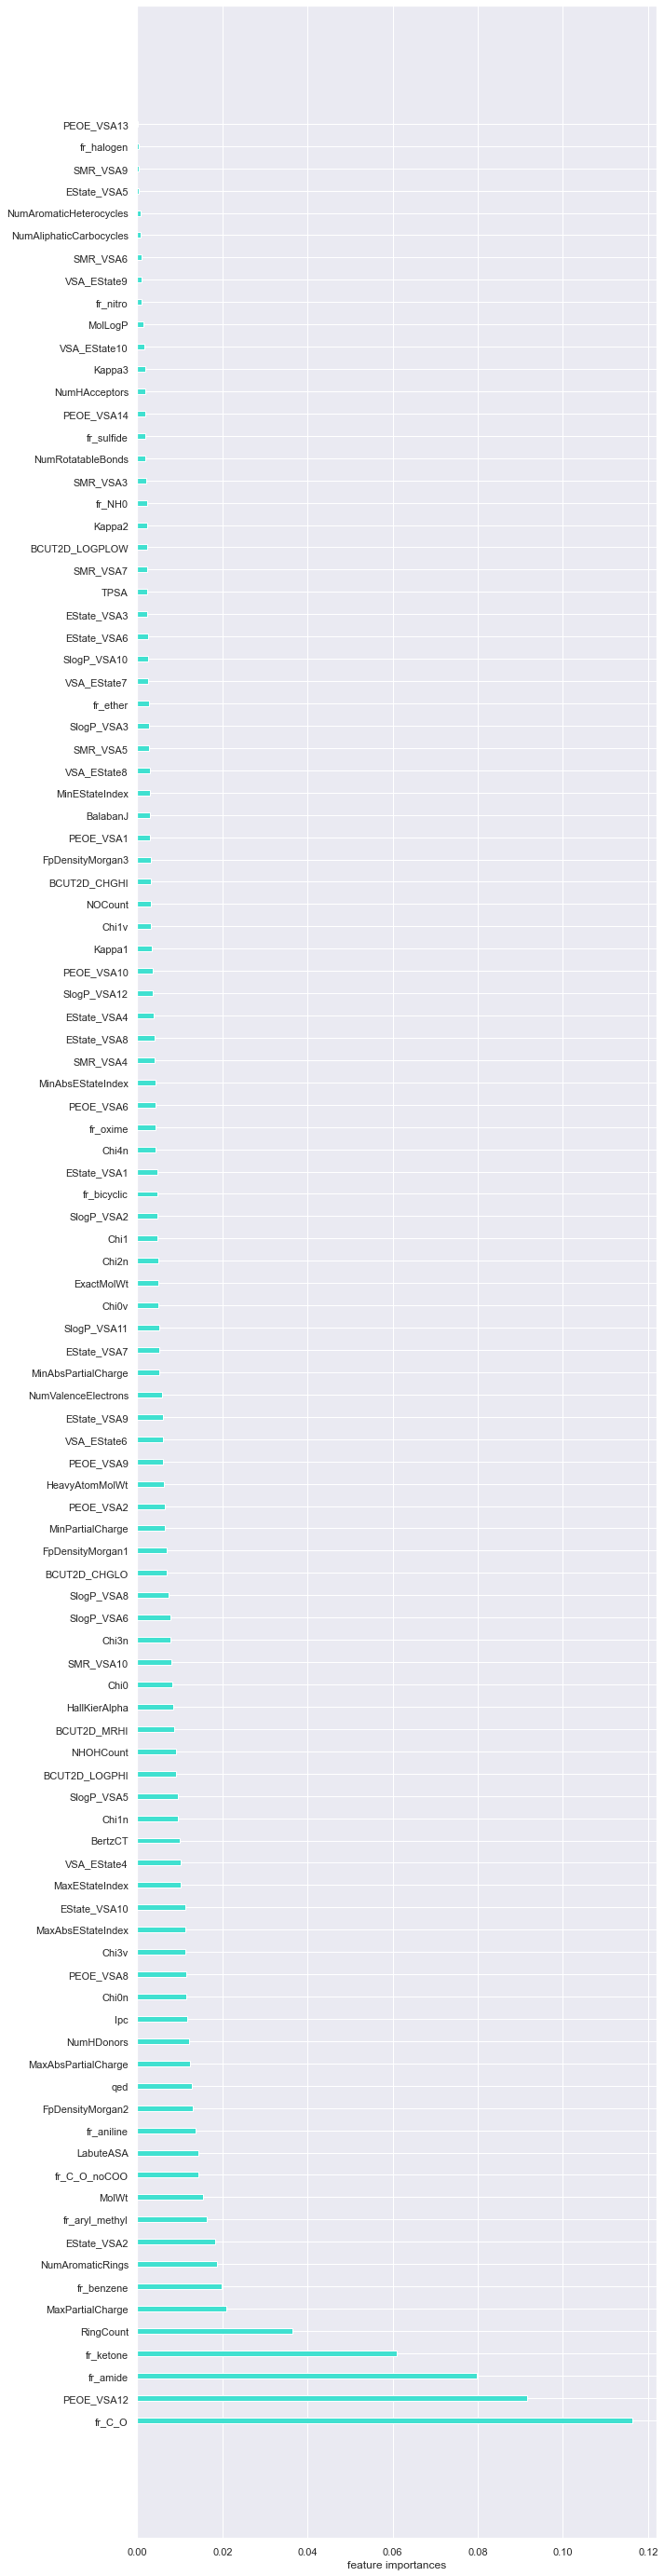

In [4]:
from plot.graph import horizontal_bar
horizontal_bar(list(descriptors.keys()), list(descriptors.values()), xlabel='feature importances', figisize=(10, 50))

In [ ]:
print(len(descriptors))

In [ ]:
delete_cols = [x for x in df.columns[1:-1] if x not in descriptors.keys()]
print(len(delete_cols))

In [ ]:
df.drop(delete_cols, axis=1, inplace=True)
df.head()

In [ ]:
df.to_csv('/Users/watanabeyuuya/OneDrive - 横浜国立大学/oxim_BDE_rdki_des.csv')

In [ ]:
from dataframe.load import load_csv
df = load_csv('./data/oxim_BDE_rdki_des.csv')
print(len(df.columns[1:-1]))

### 2-2-2. T1

model is xgboost

#### 2-2-2-1. feature importance

In [2]:
from xgboost_.analyzer import XGBoostAnalyzer
model_path = './xgboost_/model/xgb_model_T1.pickle'
analyzer = XGBoostAnalyzer(model_path)

/Users/watanabeyuuya/opt/anaconda3/envs/chem/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
from dataframe.load import load_csv
df = load_csv('./data/T1_UVS.csv')
#df = load_csv('./data/T1_oximesters_fingerprint.csv')
features = list(df.columns)
features = features[1:-1]
print(len(features), features[0], features[-1])

2028 0 2047


In [4]:
# plot feature importances
fis = analyzer.get_FI(features=features)
fis = sorted(fis.items(), key=lambda x:x[1], reverse=True)
descriptors = {}
for key, val in fis:
    if val > 0:
        descriptors[key] = val
print(descriptors)

{'715': 0.08480765, '618': 0.07629013, '352': 0.07450173, '1385': 0.044413257, '1750': 0.036585953, '1991': 0.03614002, '1195': 0.03347429, '1665': 0.031106317, '1573': 0.0293554, '827': 0.02821627, '1426': 0.021396162, '838': 0.020977871, '67': 0.017984042, '788': 0.0170426, '245': 0.016786534, '1308': 0.01280119, '802': 0.012469534, '1873': 0.011916258, '2033': 0.011204855, '875': 0.011128357, '606': 0.009335676, '378': 0.0083347345, '784': 0.0073681036, '1625': 0.0070045027, '675': 0.0069417995, '1980': 0.006878568, '1915': 0.0068644555, '1274': 0.0066217617, '984': 0.0064841914, '794': 0.0062026945, '1357': 0.0060683927, '1057': 0.0060389917, '114': 0.0060178298, '793': 0.0059924475, '1911': 0.005816623, '7': 0.0057532066, '611': 0.00561342, '614': 0.005305188, '1391': 0.0052899434, '1441': 0.0052543, '1': 0.0051871054, '1430': 0.0050490703, '816': 0.005045215, '389': 0.004975537, '1444': 0.0049515585, '703': 0.0048550703, '1460': 0.0047198627, '694': 0.004644951, '680': 0.00454587

In [ ]:
from smiles.grid_mol import grid_morganfingerprint
import os
from dotenv import load_dotenv
load_dotenv()
grid_morganfingerprint(df, list(descriptors.keys()), radius=int(os.environ['RADIUS_T1']), nBits=int(os.environ['NBITS_T1']))

#### 2-2-2-2. Shap-Analysis 

In [1]:
from neural_network.networks.dense_network import ABS_estimator
import torch
import os
import pickle
model_path = './xgboost_/model/xgb_model_T1.pickle'
with open(model_path, 'rb') as f:
    model = pickle.load(f)
    f.close()

/Users/watanabeyuuya/opt/anaconda3/envs/chem/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from dataframe.load import load_csv
test_data_path = './xgboost_/cache/test_T1.csv'
train_data_path = './xgboost_/cache/train_T1.csv'
df_test = load_csv(test_data_path)
df_train = load_csv(train_data_path)
print(len(df_test))
df_test.head()

56


,Unnamed: 0,Smiles,0,1,2,3,4,5,6,7,...,2020,2021,2022,2023,2024,2025,2026,2027,T1,pred_T1
0,0,CC(C)=NOC(=O)Nc1cccc(C(F)(F)F)c1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.3873,3.274056
1,1,CCOC(=O)CCN(Cc1ccccc1)SN(C)C(=O)O/N=C(/C)SC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.5223,3.225131
2,2,CCC(=O)O/N=C(\C)C(=O)c(c1)ccc(c12)c3c(C2(CC)CC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.5392,2.710063
3,3,O=C(NC1CCCCC1)ON=C1CCCCC1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.4366,3.701614
4,4,CCCCCC(=N\OC(=O)C)\c(cc1)cc(c12)Cc3c2ccc(c3)/C...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.4713,2.198858


In [3]:
import shap
x_train = df_train.iloc[:, 1:-1]
explainer = shap.TreeExplainer(model=model, data=x_train)

In [5]:
from dataframe.load import load_csv
df = load_csv('./data/T1_oximesters_fingerprint.csv')
features = list(df.columns)
features = features[1:-1]
print(len(features), features[0], features[-1])
x_test = df_test.iloc[:, 2:-2]
shap_values = explainer.shap_values(X=x_test)
print(shap_values.shape)

2027 0 2046
   0  1  2  3  4  5  6  7  8  9  ...  2038  2039  2040  2041  2042  2043  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
3  0  0  0  0  0  0  0  0  1  0  ...     0     0     0     0     0     0   

   2044  2045  2046  2047  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  

[4 rows x 2028 columns]
(4, 2028)


In [1]:
"""
from dataframe.load import load_csv
import os
import pickle
model_path = './xgboost_/model/xgb_model_T1.pickle'
with open(model_path, 'rb') as f:
    model = pickle.load(f)
    f.close()
df = load_csv('./data/T1_UVS.csv')
#df = load_csv('./data/T1_oximesters_fingerprint.csv')
features = list(df.columns)
features = features[1:-1]
print(len(features), features[0], features[-1])
#x_test = df_test.iloc[:, 2:-2]
x_test = df.iloc[:, 1:]
model.predict(x_test.values)
"""

/Users/watanabeyuuya/opt/anaconda3/envs/chem/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


2027 0 2046


array([3.2250984, 3.3096526, 2.8997633, 2.0147166], dtype=float32)

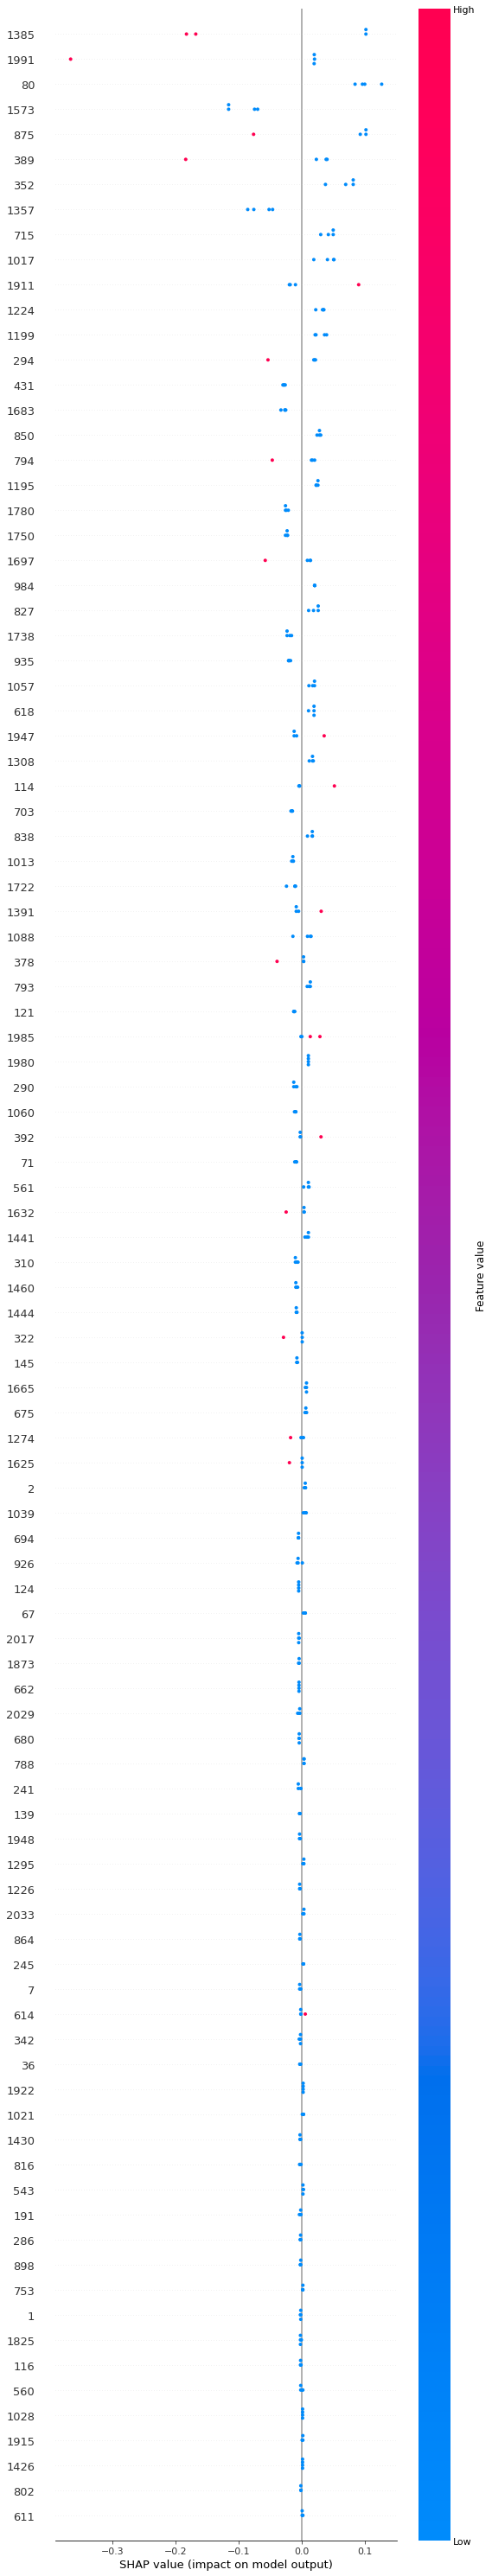

In [6]:
shap.summary_plot(shap_values, features=x_test, max_display=100)

In [7]:
df = load_csv('./data/T1_oximesters_fingerprint.csv')

In [14]:
bits_index = [1373, 350, 711, 871, 386, 80, 1011, 1186, 1215, 979, 823, 1971, 931, 1892, 1669, 1764, 699, 1990, 1007]
bits = []
for index in bits_index:
    bit = list(df.columns)[1:-1][index]
    bits.append(bit)
print(bits)

['1385', '352', '715', '875', '389', '80', '1017', '1195', '1224', '984', '827', '1991', '935', '1911', '1683', '1780', '703', '2010', '1013']


In [15]:
from smiles.grid_mol import grid_morganfingerprint
import os
from dotenv import load_dotenv
load_dotenv()
grid_morganfingerprint(df, bits, radius=int(os.environ['RADIUS_T1']), nBits=int(os.environ['NBITS_T1']))

In [16]:
col = '1373'
target = df_train[df_train[col] == 1]
target[col]

1      1
2      1
4      1
5      1
6      1
      ..
215    1
216    1
219    1
222    1
223    1
Name: 1373, Length: 105, dtype: int64

In [18]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
smiles = target.iloc[0]['Smiles']
print(smiles)
mol = Chem.MolFromSmiles(smiles)
bitI_morgan = {}
fp_morgan = AllChem.GetMorganFingerprintAsBitVect(mol, int(os.environ['RADIUS_T1']), int(os.environ['NBITS_T1']), bitInfo=bitI_morgan)
print(bitI_morgan)
Draw.DrawMorganBit(mol, int(col), bitI_morgan)

c1cccc(c12)C(=O)N(C2=O)Cc3ccc(cc3)/C(CC)=N\OC(=O)C
{12: ((8, 2),), 80: ((11, 0), (19, 0)), 140: ((22, 1),), 284: ((11, 3),), 294: ((20, 1),), 308: ((14, 3),), 310: ((13, 2), (17, 2)), 314: ((7, 1), (10, 1)), 352: ((4, 1), (5, 1)), 431: ((21, 1),), 438: ((8, 3),), 464: ((9, 3), (6, 3)), 475: ((11, 2),), 555: ((13, 3),), 588: ((8, 1),), 640: ((12, 3),), 642: ((6, 2), (9, 2)), 650: ((7, 0), (10, 0), (24, 0)), 667: ((3, 3), (0, 3)), 695: ((22, 0),), 725: ((21, 0),), 807: ((18, 0), (23, 0)), 879: ((6, 1), (9, 1)), 898: ((19, 1),), 935: ((8, 0),), 984: ((3, 2), (0, 2)), 995: ((21, 2),), 1017: ((25, 1),), 1035: ((23, 1),), 1057: ((20, 0), (25, 0)), 1070: ((15, 3),), 1088: ((1, 1), (2, 1)), 1199: ((2, 2), (1, 2)), 1262: ((23, 2),), 1321: ((2, 3), (1, 3)), 1365: ((19, 2),), 1380: ((4, 0), (5, 0), (6, 0), (9, 0), (12, 0), (15, 0)), 1385: ((15, 1),), 1390: ((18, 3),), 1391: ((15, 2),), 1395: ((22, 2),), 1571: ((18, 2),), 1599: ((4, 3),), 1632: ((18, 1),), 1683: ((12, 2),), 1697: ((14, 2), (16, 2)

KeyError: 1373

In [6]:
from smiles.grid_mol import grid_morganfingerprint
grid_morganfingerprint(df_train, list(df_train.iloc[:, 1:-1].columns), radius=int(os.environ['RADIUS_T1']), nBits=int(os.environ['NBITS_T1']))

RDKit ERROR: [12:49:06] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9
RDKit ERROR: 
RDKit ERROR: [12:49:06] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 9
RDKit ERROR: 


In [7]:
from smiles.grid_mol import grid_morganfingerprint
import os
from dotenv import load_dotenv
load_dotenv()
df = load_csv('./data/T1_oximesters_fingerprint.csv')
bits_index = [1683, 121, 1011, 1373, 1997, 823, 292, 350, 557, 1022, 1015, 1190, 428, 1764, 308, 1007, 240, 1723, 288, 2009, 784, 1960, 608, 1053]
bits = []
for index in bits_index:
    bit = list(df.columns)[1:-1][index]
    bits.append(bit)
print(bits)
grid_morganfingerprint(df, bits, radius=int(os.environ['RADIUS_abs']), nBits=int(os.environ['NBITS_abs']))

['1697', '121', '1017', '1385', '2017', '827', '294', '352', '560', '1028', '1021', '1199', '431', '1780', '310', '1013', '241', '1738', '290', '2029', '788', '1980', '611', '1060']


### 2-2-2. Neural Network

#### 2-2-2-1. abs

In [1]:
from neural_network.networks.dense_network import ABS_estimator
import torch
import os
model_path = './neural_network/model/model_absorbance_label.pth'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ABS_estimator(first_node=2028, use_dropout=False, use_batchnorm=True).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))

<All keys matched successfully>

In [2]:
from dataframe.load import load_csv
test_data_path = './neural_network/cache/test_absorbance_label.csv'
train_data_path = './neural_network/cache/train_absorbance_label.csv'
df_test = load_csv(test_data_path)
df_train = load_csv(train_data_path)
print(len(df_test))
df_test.head()

51


,Smiles,0,1,2,3,4,5,6,7,8,...,2020,2021,2022,2023,2024,2025,2026,2027,absorbance_label,pred_absorbance_label
0,CC(=O)O/N=C(\C)C(=O)c1c(O)c(cc(C)c1)-n(n2)nc(c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.669626
1,CNC(=O)ON=C(c1ccccc1)c1ccccc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.289660
2,COc1ccc(/C=N/OC(=O)c2cc([N+](=O)[O-])cc([N+](=...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.295514
3,c1ccccc1-c2ccc(cc2)/C(CCCCC)=N/OC(=O)CC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.694180
4,CC(C)(Oc1ccc(Cl)cc1)/C(N)=N/OC(=O)c1cccnc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.361295


In [3]:
import shap
x_train = torch.FloatTensor(df_train.iloc[:, 1:-1].values)
de = shap.DeepExplainer(model, x_train)

In [4]:
x_test = torch.FloatTensor(df_test.iloc[:, 1:-2].values)
values = de.shap_values(x_test)
print(values.shape)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


(51, 2028)


51


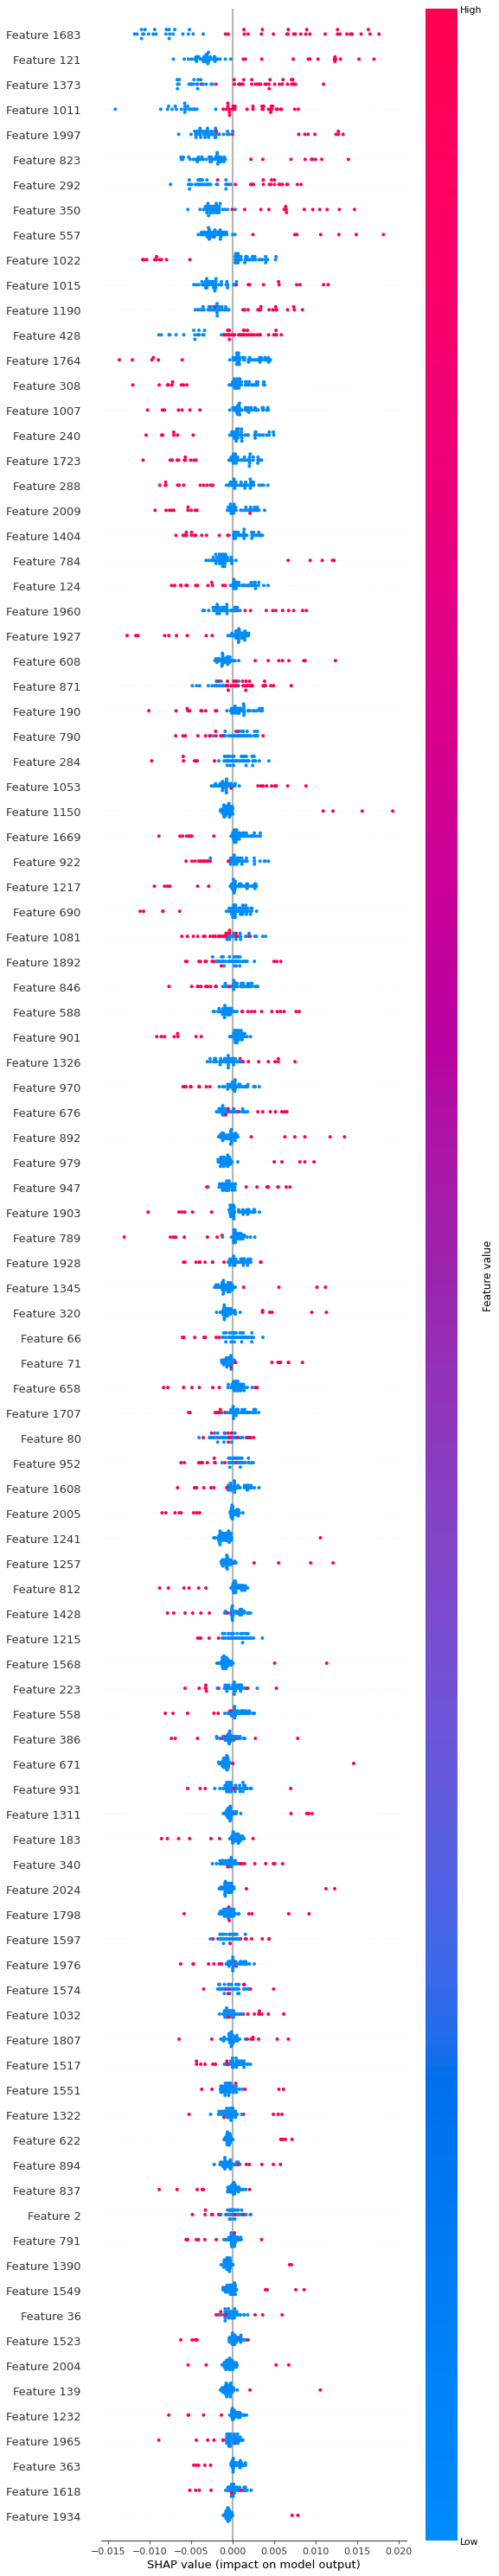

In [5]:
print(len(x_test))
shap.summary_plot(values, features=x_test, max_display=100)

In [6]:
from smiles.grid_mol import grid_morganfingerprint
import os
from dotenv import load_dotenv
load_dotenv()
df = load_csv('./data/oximesters_fingerprint_abs.csv')
bits_index = [1683, 121, 1011, 1373, 1997, 823, 292, 350, 557, 1022, 1015, 1190, 428, 1764, 308, 1007, 240, 1723, 288, 2009, 784, 1960, 608, 1053]
bits = []
for index in bits_index:
    bit = list(df.columns)[1:-1][index]
    bits.append(bit)
print(bits)
grid_morganfingerprint(df, bits, radius=int(os.environ['RADIUS_abs']), nBits=int(os.environ['NBITS_abs']))

['1697', '121', '1017', '1385', '2017', '827', '294', '352', '560', '1028', '1021', '1199', '431', '1780', '310', '1013', '241', '1738', '290', '2029', '788', '1980', '611', '1060']


In [44]:
columns = list(df_test.columns)
print(columns[55])

PEOE_VSA5


In [43]:
print(values[0][40])

0.004576748702675104


# 3. AutoMl

In [ ]:
%run automl/pycaret_automl.py --df_path='./data/oxim_BDE_rdki_des.csv' --target='BDE'

In [ ]:
from xgboost_.dataloader import dataloader, dataloader_rdkit
x_train, x_test, y_train, y_test = dataloader_rdkit('./data/descriptors_bde.csv', 'BDE')
print('shape of x_train: {}\n shape of x_test: {}\n shape of y_train: {}\n shape of y_test: {}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from pycaret.regression import setup, compare_models
import argparse
import sys
sys.path.append('../')
from dataframe.load import load_csv
import os
from dotenv import load_dotenv
load_dotenv()

In [ ]:
df_path = './data/oxim_BDE_rdki_des.csv'
target = 'BDE'
df = load_csv(df_path)
df.head()